First let's crop images from the ghibili dataset ...

First Dataset: https://www.kaggle.com/datasets/shubham1921/real-to-ghibli-image-dataset-5k-paired-images ...

In [9]:
import os
import cv2
import tqdm

In [ ]:
input_folder = './data/trainB_ghibli'
output_folder = './data/final_trainB'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)
cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')

nr_of_faces = 0
tqdm.tqdm.write("Starting face detection...")

# Iterate through all images in the input folder
for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24))
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face
            face = img[y:y+h, x:x+w]
            # Save the cropped face
            output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
            cv2.imwrite(output_path, face)
            nr_of_faces += 1
        
print(f"Total faces detected and saved: {nr_of_faces}")
print("Face detection and saving completed.")

Starting face detection...


Processing images: 100%|██████████| 2500/2500 [03:09<00:00, 13.19image/s]

Total faces detected and saved: 484
Face detection and saving completed.


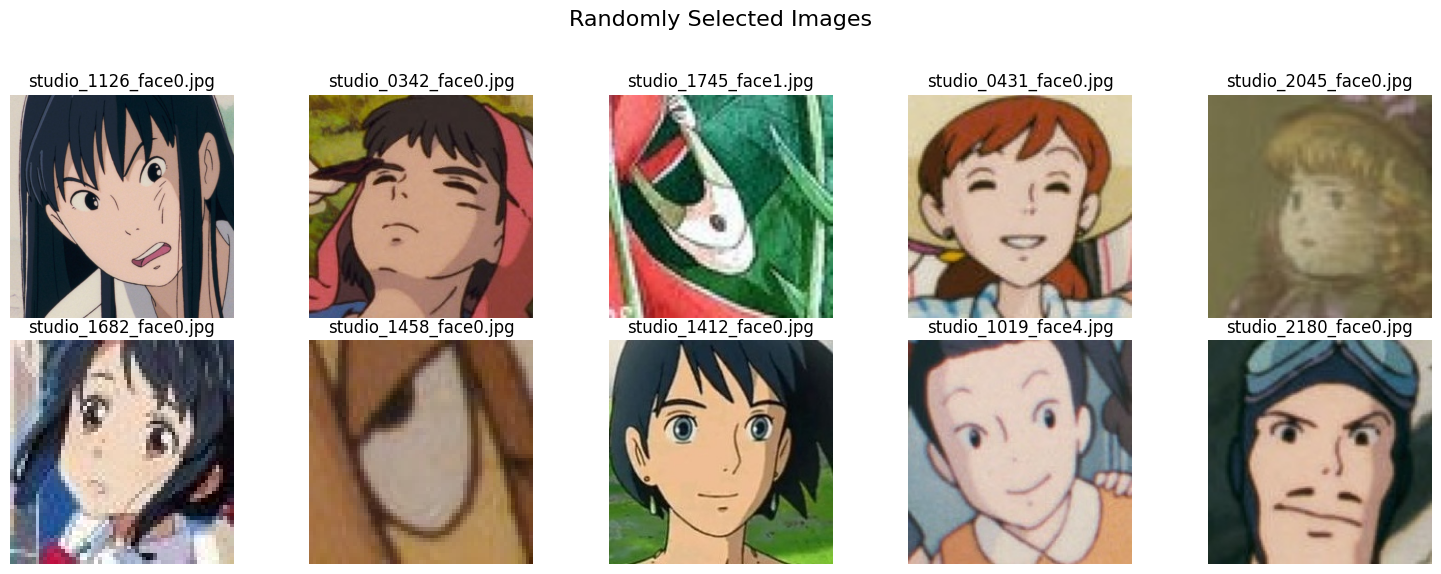

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def plot_random_images(folder_path, num_images=10):
    """
    Plots a specified number of random images from a given folder.

    Parameters:
        folder_path (str): Path to the folder containing the images.
        num_images (int): Number of random images to plot. Default is 10.
    """
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Randomly select images
    random_images = random.sample(image_files, num_images)

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Randomly Selected Images', fontsize=16)

    # Flatten the axes array for easy iteration
    axes = axes.ravel()

    # Loop through the selected images and display them
    for ax, img_file in zip(axes, random_images):
        # Read the image
        img_path = os.path.join(folder_path, img_file)
        img = mpimg.imread(img_path)

        # Display the image
        ax.imshow(img)
        ax.axis('off')  # Hide the axes
        ax.set_title(img_file)  # Set the title to the image file name

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots
    plt.show()  # Show the plot

plot_random_images(output_folder, num_images=10)

second_dataset: https://github.com/awesomedevnotes/awesome-studio-ghibli-works-images?tab=readme-ov-file#spirited-away

Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.09image/s]


Total faces detected and saved: 42
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.39image/s]


Total faces detected and saved: 7
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.16image/s]


Total faces detected and saved: 7
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:13<00:00,  4.04image/s]


Total faces detected and saved: 20
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:11<00:00,  4.45image/s]


Total faces detected and saved: 17
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.39image/s]


Total faces detected and saved: 10
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.19image/s]


Total faces detected and saved: 23
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:13<00:00,  4.04image/s]


Total faces detected and saved: 26
Face detection and saving completed.


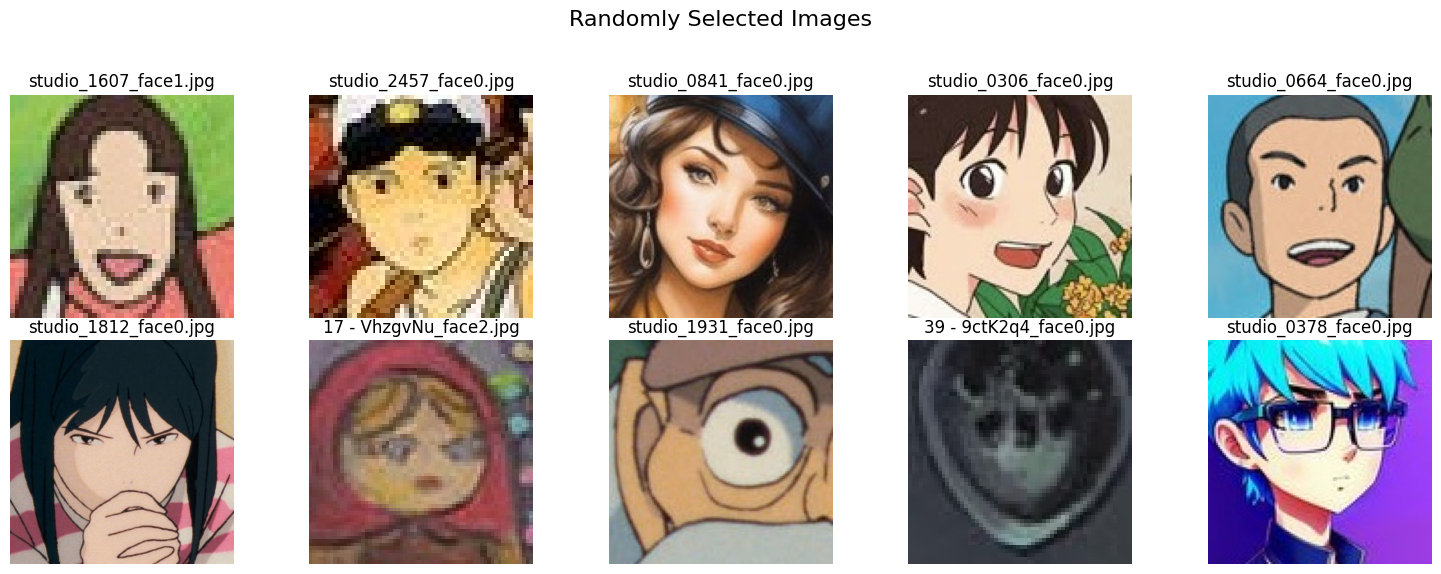

In [35]:
def detect_and_crop_faces(input_folder, output_folder, cascade_path, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24)):
    """
    Detects faces in images from the input folder, crops them, and saves them to the output folder.

    Parameters:
        input_folder (str): Path to the folder containing input images.
        output_folder (str): Path to the folder where cropped faces will be saved.
        cascade_path (str): Path to the Haar cascade XML file for face detection.
        scaleFactor (float): Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors (int): Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize (tuple): Minimum possible object size. Objects smaller than this are ignored.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    cascade = cv2.CascadeClassifier(cascade_path)

    nr_of_faces = 0
    tqdm.tqdm.write("Starting face detection...")

    # Iterate through all images in the input folder
    for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces
            faces = cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
            for i, (x, y, w, h) in enumerate(faces):
                # Crop the face
                face = img[y:y+h, x:x+w]
                # Save the cropped face
                output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
                cv2.imwrite(output_path, face)
                nr_of_faces += 1

    print(f"Total faces detected and saved: {nr_of_faces}")
    print("Face detection and saving completed.")

list_folders = ["From_Up_on_Poppy_Hill", "Tales_from_Earthsea", "tales_tales", "The_Tale_of_Princess_Kaguya", "The_Wind_Rises", "When_Marnie_Was_There", "Spirited_Away", "Arrietty", ]
for folder in list_folders:
    detect_and_crop_faces(f"./data/{folder}/", f"./data/final_trainB/", 'lbpcascade_animeface.xml', scaleFactor=1.05, minNeighbors=5, minSize=(12, 12))
plot_random_images(f"./data/final_trainB/", num_images=10)

third dataset: https://www.kaggle.com/datasets/amulbel/ghibli-movies-pictures

In [28]:
detect_and_crop_faces(
    input_folder='./data/Ghibli_movie_dataset',
    output_folder='./data/final_trainB',
    cascade_path='lbpcascade_animeface.xml',
    scaleFactor=1.05,
    minNeighbors=5,
    minSize=(24, 24)
)

Starting face detection...


Processing images: 100%|██████████| 943/943 [00:11<00:00, 79.34image/s]

Total faces detected and saved: 460
Face detection and saving completed.


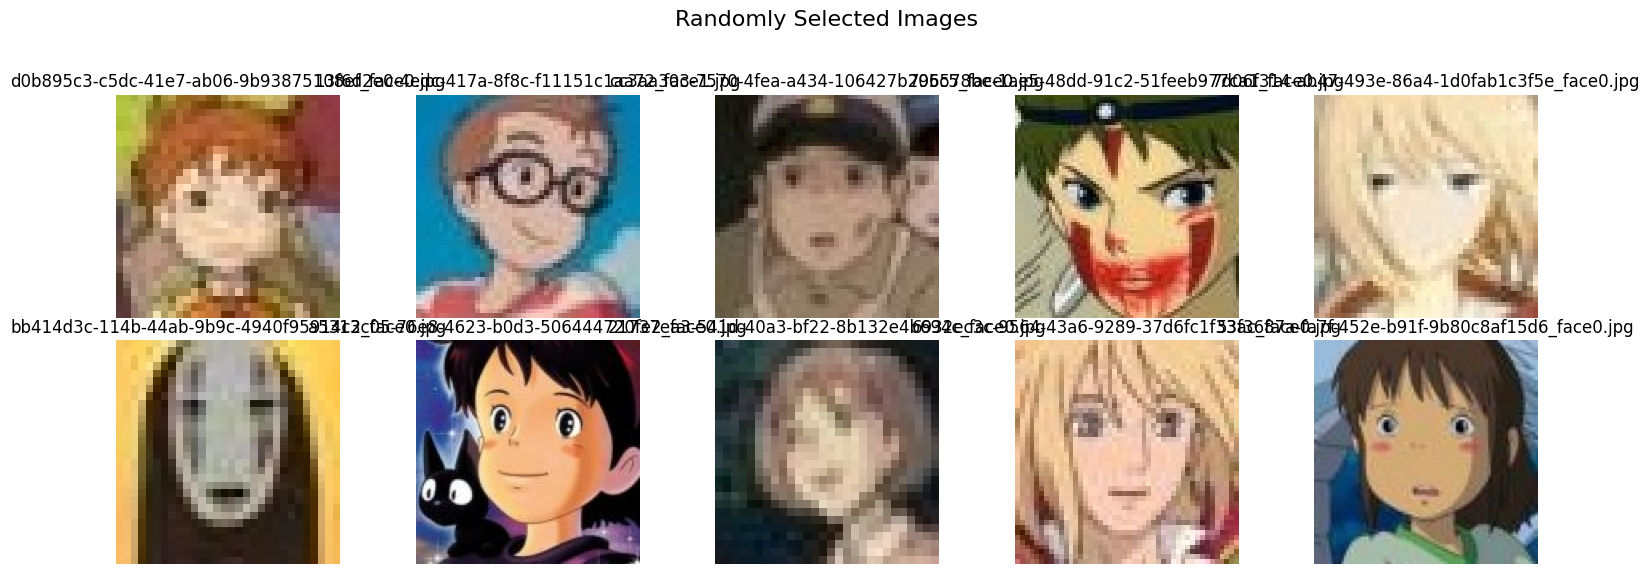

In [27]:
plot_random_images('./data/final_trainB_', num_images=10)

Now let's crop the real world faces of humans ...

First, from the first dataset ...

In [ ]:
# Adapted code to use a face detector
input_folder = './data/trainA'
output_folder = './data/final_trainA'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

nr_of_faces = 0
tqdm.tqdm.write("Starting face detection...")

# Iterate through all images in the input folder
for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24))
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face
            face = img[y:y+h, x:x+w]
            # Save the cropped face
            output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
            cv2.imwrite(output_path, face)
            nr_of_faces += 1

print(f"Total faces detected and saved: {nr_of_faces}")
print("Face detection and saving completed.")

Starting face detection...


Processing images: 100%|██████████| 2500/2500 [03:34<00:00, 11.66image/s]

Total faces detected and saved: 1136
Face detection and saving completed.


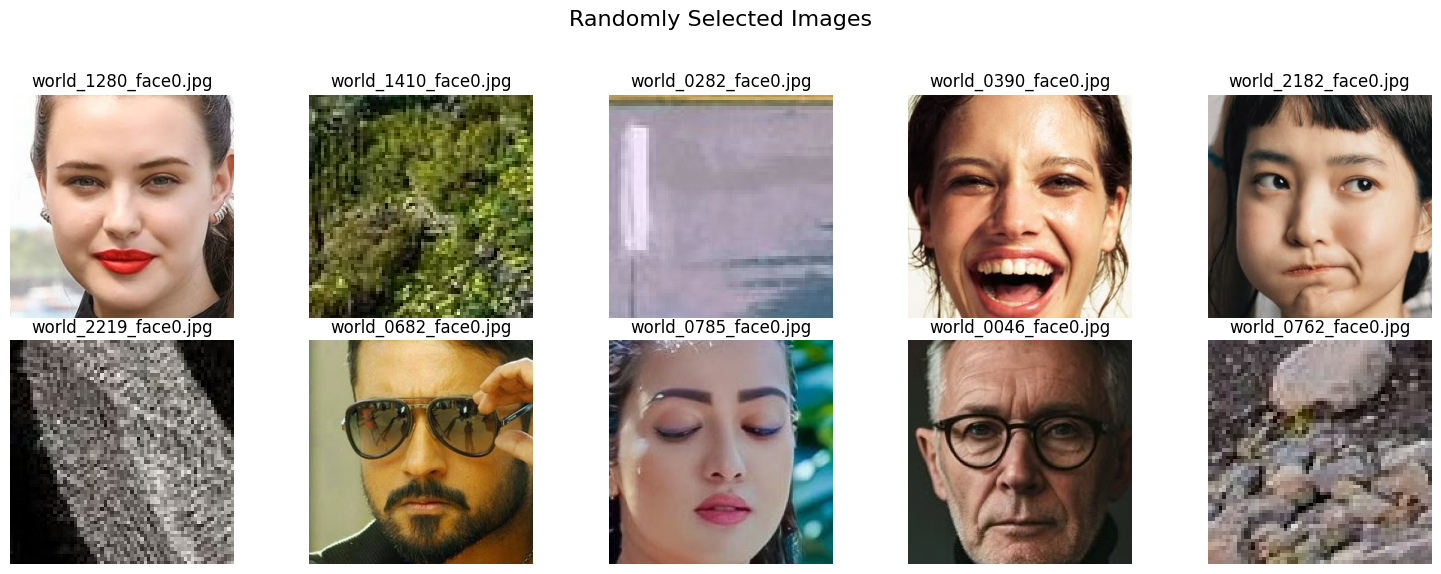

In [22]:
plot_random_images(output_folder, num_images=10)

... a lot of outliers ...


New dataset: https://www.kaggle.com/datasets/ashwingupta3012/human-faces

Starting face detection...


Processing images: 100%|██████████| 7219/7219 [18:19<00:00,  6.57image/s]  


Total faces detected and saved: 8081
Face detection and saving completed.


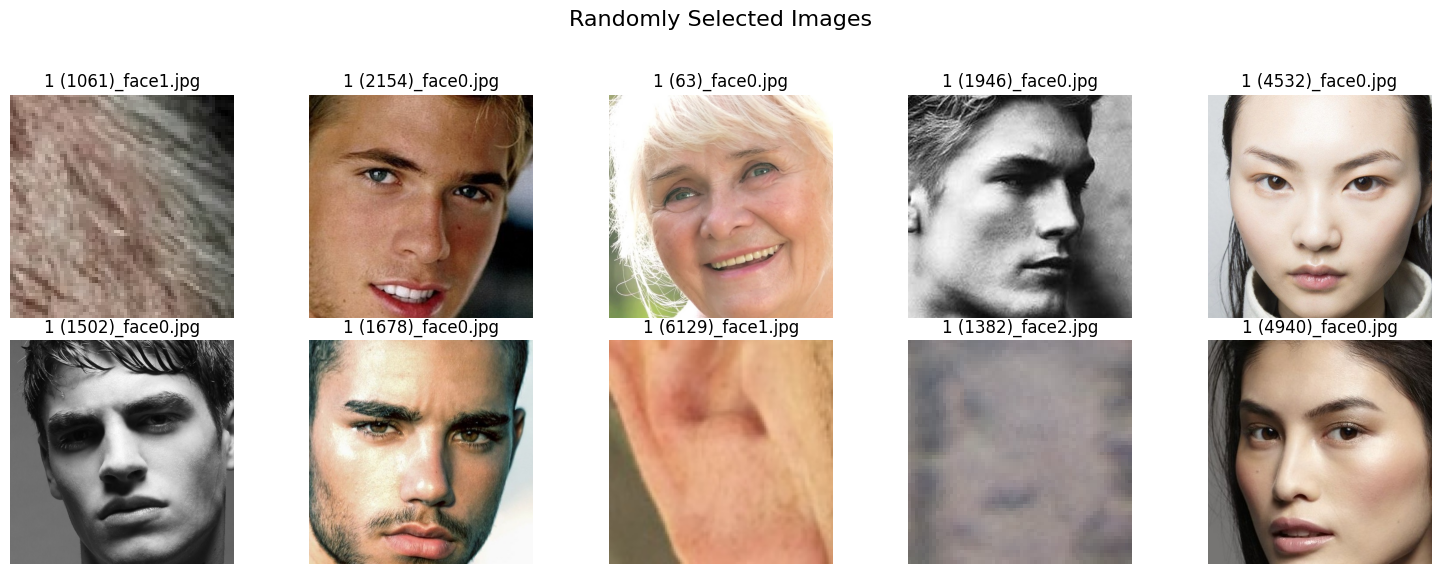

In [24]:
# lets define this useful function 
def detect_and_crop_faces(input_folder, output_folder, cascade_path, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24)):
    """
    Detects faces in images from the input folder, crops them, and saves them to the output folder.

    Parameters:
        input_folder (str): Path to the folder containing input images.
        output_folder (str): Path to the folder where cropped faces will be saved.
        cascade_path (str): Path to the Haar cascade XML file for face detection.
        scaleFactor (float): Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors (int): Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize (tuple): Minimum possible object size. Objects smaller than this are ignored.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    cascade = cv2.CascadeClassifier(cascade_path)

    nr_of_faces = 0
    tqdm.tqdm.write("Starting face detection...")

    # Iterate through all images in the input folder
    for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces
            faces = cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
            for i, (x, y, w, h) in enumerate(faces):
                # Crop the face
                face = img[y:y+h, x:x+w]
                # Save the cropped face
                output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
                cv2.imwrite(output_path, face)
                nr_of_faces += 1

    print(f"Total faces detected and saved: {nr_of_faces}")
    print("Face detection and saving completed.")

detect_and_crop_faces('./data/Humans', './data/final_trainB_2', cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
plot_random_images('./data/final_trainB_2', num_images=10)

Now lets try go get banned by google ... 

In [1]:
import json

# Path to the JSON file
file_path = 'google_scrapper.json'

# Open the file and load the content
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Print the loaded data
print(data)


[{'query': 'ghibli style portrait', 'origin': 'timesofindia.indiatimes.com', 'title': 'Ghibli Style Image: How to create Ghibli-style Portraits without paying for  ChatGPT Plus | - The Times of India', 'imageUrl': 'https://static.toiimg.com/thumb/msid-119581318,width-1280,height-720,resizemode-4/119581318.jpg', 'imageWidth': 1280, 'imageHeight': 720, 'thumbnailUrl': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQL69zEJE74qgbP9TO5eunGorHPKkLtwVfUCw&s', 'thumbnailWidth': 300, 'thumbnailHeight': 168, 'contentUrl': 'https://timesofindia.indiatimes.com/technology/tech-news/how-to-create-ghibli-style-portraits-without-paying-for-chatgpt-plus/articleshow/119581346.cms'}, {'query': 'ghibli style portrait', 'origin': 'www.instagram.com', 'title': 'Ghibli Trend>>❤️🌸✨🫶🏻, ., How to turn your photo into a Ghibli-style  portrait using ChatGPT:, 1. Open ChatGPT, 2. choose the option with image  model., 3. Upload your photo., 4. Use this prompt: ...', 'imageUrl': 'https://lookaside.instagram.

In [1]:
# go to every imageUrl and download the image to data/final_trainB_2
import requests
import os
from tqdm import tqdm
import json
import random
import time
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


def download_images_from_json(json_file, output_folder):
    """
    Downloads images from URLs specified in a JSON file and saves them to a specified folder.

    Parameters:
        json_file (str): Path to the JSON file containing image URLs.
        output_folder (str): Path to the folder where images will be saved.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Load the JSON data
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Iterate through each item in the JSON data
    i = 0
    for item in tqdm(data, desc="Downloading images", unit="image"):
        i += 1
        image_url = item.get('imageUrl')
        if image_url:
            try:
                # Send a GET request to the image URL
                response = requests.get(image_url, stream=True)
                response.raise_for_status()  # Raise an error for bad responses

                # Extract the image name from the URL
                image_name = f"Google{i}.jpg"
                output_path = os.path.join(output_folder, image_name)

                # Save the image to the output folder
                with open(output_path, 'wb') as img_file:
                    for chunk in response.iter_content(1024):
                        img_file.write(chunk)

            except requests.exceptions.RequestException as e:
                print(f"Error downloading {image_url}: {e}")


download_images_from_json('google_scrapper.json', './data/final_trainB_3')

Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/8__taare_zameen_par_1743059484900_1743247296802.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/8__taare_zameen_par_1743059484900_1743247296802.jpg


Error downloading https://sketchmob.com/wp-content/uploads/2021/05/B3kIBX4TdFh9CRMCUARJS0h8Ch4nSEYTFBMgXF1b.jpg: 403 Client Error: Forbidden for url: https://sketchmob.com/wp-content/uploads/2021/05/B3kIBX4TdFh9CRMCUARJS0h8Ch4nSEYTFBMgXF1b.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7487675264080743711&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487675264080743711&location=0&aid=1988


Error downloading https://sketchmob.com/wp-content/uploads/2021/05/B3kHBngSdFh5VhdQBVYfTUh8Ch4nSEYTFBMgXF1b.jpg: 403 Client Error: Forbidden for url: https://sketchmob.com/wp-content/uploads/2021/05/B3kHBngSdFh5VhdQBVYfTUh8Ch4nSEYTFBMgXF1b.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7489763212011785480&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7489763212011785480&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/04/01/550x309/Russian_influencer_ghibli_1743491639260_1743491639480.jpeg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/04/01/550x309/Russian_influencer_ghibli_1743491639260_1743491639480.jpeg
Error downloading https://english.mathrubhumi.com/image/contentid/policy:1.10463122:1743173246/chatgpt%20ghibli.jpg?$p=71e74de&f=16x10&w=852&q=0.8: 404 Client Error: Not Found for url: https://english.mathrubhumi.com/image/contentid/policy:1.10463122:1743173246/chatgpt%20ghibli.jpg?$p=71e74de&f=16x10&w=852&q=0.8


Error downloading https://cecileyadro.com/wp-content/uploads/2023/08/23.png: 403 Client Error: Forbidden for url: https://cecileyadro.com/wp-content/uploads/2023/08/23.png


Error downloading https://www.tiktok.com/api/img/?itemId=7488016434941971754&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7488016434941971754&location=0&aid=1988


Error downloading https://sketchmob.com/wp-content/uploads/2021/02/AHIMAHoXdFwqVUYKUwFIGkh8Ch4nSEYTFBMgXF1b.jpg: 403 Client Error: Forbidden for url: https://sketchmob.com/wp-content/uploads/2021/02/AHIMAHoXdFwqVUYKUwFIGkh8Ch4nSEYTFBMgXF1b.jpg
Error downloading https://www.financialexpress.com/wp-content/uploads/2025/03/FotoJet-69.jpg?w=440: 403 Client Error: Forbidden for url: https://www.financialexpress.com/wp-content/uploads/2025/03/FotoJet-69.jpg?w=440


Error downloading https://www.tiktok.com/api/img/?itemId=7495244250817400110&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7495244250817400110&location=0&aid=1988


Error downloading https://apollo.olx.in/v1/files/rh88ornlsevn-ADVIN/image;s=300x600;q=60: 410 Client Error: Gone for url: https://apollo.olx.in/v1/files/rh88ornlsevn-ADVIN/image;s=300x600;q=60


Error downloading https://sketchmob.com/wp-content/uploads/2019/05/AnMNA3cVdFgvVRNXBV4cS0h8Ch4nSEYTFBMgXF1b.jpg: 403 Client Error: Forbidden for url: https://sketchmob.com/wp-content/uploads/2019/05/AnMNA3cVdFgvVRNXBV4cS0h8Ch4nSEYTFBMgXF1b.jpg


Error downloading https://blog.kissfm.lk/wp-content/uploads/2025/03/486.png: 406 Client Error: Not Acceptable for url: https://blog.kissfm.lk/wp-content/uploads/2025/03/486.png


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/miyazaki_1743146004354_1743248846296.jpeg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/miyazaki_1743146004354_1743248846296.jpeg


Error downloading https://www.tiktok.com/api/img/?itemId=7487367138374733063&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487367138374733063&location=0&aid=1988


Error downloading https://www.geeky-gadgets.com/wp-content/uploads/2025/03/ai-image-creator-features-and-benefits.webp: 403 Client Error: Forbidden for url: https://www.geeky-gadgets.com/wp-content/uploads/2025/03/ai-image-creator-features-and-benefits.webp


Error downloading https://www.tiktok.com/api/img/?itemId=7489133138401070343&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7489133138401070343&location=0&aid=1988


Error downloading https://images.jpost.com/image/upload/q_auto/c_fill,g_faces:center,h_537,w_822/656842: 403 Client Error: Forbidden for url: https://images.jpost.com/image/upload/q_auto/c_fill,g_faces:center,h_537,w_822/656842


Error downloading https://www.tiktok.com/api/img/?itemId=7493080050162617608&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7493080050162617608&location=0&aid=1988


Error downloading https://s.france24.com/media/display/cb49f214-0b46-11f0-afc6-005056bf30b7/w:1280/p:16x9/5b095a63e7594321290cf9fd446aa61d06c180b2.jpg: 403 Client Error: Forbidden for url: https://s.france24.com/media/display/cb49f214-0b46-11f0-afc6-005056bf30b7/w:1280/p:16x9/5b095a63e7594321290cf9fd446aa61d06c180b2.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7489548168967785733&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7489548168967785733&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/04/06/550x309/Grant_Slatton_Ghibli_1743924073219_1743924086195.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/04/06/550x309/Grant_Slatton_Ghibli_1743924073219_1743924086195.jpg


Error downloading https://english.mathrubhumi.com/image/contentid/policy:1.10459767:1743045654/gibhli.jpg?$p=3e572e2&f=16x10&w=852&q=0.8: 404 Client Error: Not Found for url: https://english.mathrubhumi.com/image/contentid/policy:1.10459767:1743045654/gibhli.jpg?$p=3e572e2&f=16x10&w=852&q=0.8


Error downloading https://www.tiktok.com/api/img/?itemId=7487233815648275734&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487233815648275734&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/ghibli_image_1743231689392_1743231689782.png: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/ghibli_image_1743231689392_1743231689782.png


Error downloading https://www.tiktok.com/api/img/?itemId=7486937099556424978&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7486937099556424978&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7489161276459879702&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7489161276459879702&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/04/06/550x309/parineeti_raghav_Studio_ghibli_1743917509270_1743917509611.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/04/06/550x309/parineeti_raghav_Studio_ghibli_1743917509270_1743917509611.jpg


Error downloading https://petapixel.com/assets/uploads/2025/03/Studio-Ghibli-Photos.jpg: 403 Client Error: Forbidden for url: https://petapixel.com/assets/uploads/2025/03/Studio-Ghibli-Photos.jpg


Error downloading https://petapixel.com/assets/uploads/2025/03/Studio-Ghibli-Photos.jpg: 403 Client Error: Forbidden for url: https://petapixel.com/assets/uploads/2025/03/Studio-Ghibli-Photos.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7487193313125092630&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487193313125092630&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/29/1600x900/Gm8d8APbYAABxhq_1743251914129_1743251918917.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/29/1600x900/Gm8d8APbYAABxhq_1743251914129_1743251918917.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7487258208739052846&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487258208739052846&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/31/550x309/Studio_Ghibli_portrait_1743398031438_1743398031813.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/31/550x309/Studio_Ghibli_portrait_1743398031438_1743398031813.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7488407906887470352&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7488407906887470352&location=0&aid=1988
Error downloading https://www.financialexpress.com/wp-content/uploads/2025/03/1200x675-34-5.jpg?w=440: 403 Client Error: Forbidden for url: https://www.financialexpress.com/wp-content/uploads/2025/03/1200x675-34-5.jpg?w=440


Error downloading https://s.france24.com/media/display/cb49f214-0b46-11f0-afc6-005056bf30b7/w:1280/p:16x9/5b095a63e7594321290cf9fd446aa61d06c180b2.jpg: 403 Client Error: Forbidden for url: https://s.france24.com/media/display/cb49f214-0b46-11f0-afc6-005056bf30b7/w:1280/p:16x9/5b095a63e7594321290cf9fd446aa61d06c180b2.jpg
Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/27/550x309/ghibli_1743062985077_1743062985424.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/27/550x309/ghibli_1743062985077_1743062985424.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7486948102088248594&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7486948102088248594&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/30/550x309/chatgpt_1743333054793_1743333061246.png: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/30/550x309/chatgpt_1743333054793_1743333061246.png


Error downloading https://www.tiktok.com/api/img/?itemId=7498172920431136030&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7498172920431136030&location=0&aid=1988


Error downloading https://m.sakshipost.com/sites/default/files/styles/cinema_main/public/article_images/2025/03/28/news18-1-6-2025-03-1d552e1fa9217-1743140747.jpg?itok=1Vr8NzQV: ('Connection broken: IncompleteRead(16052 bytes read, 3845 more expected)', IncompleteRead(16052 bytes read, 3845 more expected))


Error downloading https://www.hindustantimes.com/ht-img/img/2025/04/06/550x309/parineeti_raghav_Studio_ghibli_1743917509270_1743917509611.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/04/06/550x309/parineeti_raghav_Studio_ghibli_1743917509270_1743917509611.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7489517936139521302&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7489517936139521302&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/04/02/550x309/chat_gpt_studio_ghibli_1743581371595_1743581394345.png: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/04/02/550x309/chat_gpt_studio_ghibli_1743581371595_1743581394345.png


Error downloading https://render.fineartamerica.com/images/images-profile-flow/400/images/artworkimages/mediumlarge/3/animation-art-studio-ghibli-style-clear-reflection-freu-1741ac5d-6bc5-4bfe-8a40-167968f3-celestial-images.jpg: 403 Client Error: Forbidden for url: https://render.fineartamerica.com/images/images-profile-flow/400/images/artworkimages/mediumlarge/3/animation-art-studio-ghibli-style-clear-reflection-freu-1741ac5d-6bc5-4bfe-8a40-167968f3-celestial-images.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7487070514490608942&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487070514490608942&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7493978769686940950&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7493978769686940950&location=0&aid=1988


Error downloading https://english.mathrubhumi.com/image/contentid/policy:1.10468376:1743326437/Pixar-Ghibli.jfif?$p=4bd62d4&f=16x10&w=852&q=0.8: 404 Client Error: Not Found for url: https://english.mathrubhumi.com/image/contentid/policy:1.10468376:1743326437/Pixar-Ghibli.jfif?$p=4bd62d4&f=16x10&w=852&q=0.8


Error downloading https://www.tiktok.com/api/img/?itemId=7487193313125092630&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487193313125092630&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/instagram_1743243840680_1743243840955.jpg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/instagram_1743243840680_1743243840955.jpg


Error downloading https://www.tiktok.com/api/img/?itemId=7487286248902610206&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487286248902610206&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7490091033334680839&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7490091033334680839&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7493780303509556501&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7493780303509556501&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7487852174320389431&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7487852174320389431&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7488064089218878751&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7488064089218878751&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7491692910841318662&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7491692910841318662&location=0&aid=1988


Error downloading https://www.tiktok.com/api/img/?itemId=7490528863991155973&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7490528863991155973&location=0&aid=1988


Error downloading https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/Trump_ghibli_photos_1743089376924_1743245956862.jpeg: 401 Client Error: Unauthorized for url: https://www.hindustantimes.com/ht-img/img/2025/03/29/550x309/Trump_ghibli_photos_1743089376924_1743245956862.jpeg


Error downloading https://www.tiktok.com/api/img/?itemId=7493199111915572535&location=0&aid=1988: 403 Client Error: Forbidden for url: https://www.tiktok.com/api/img/?itemId=7493199111915572535&location=0&aid=1988


In [21]:
detect_and_crop_faces(f"./data/final_trainB_3/", f"./data/final_trainB/", 'lbpcascade_animeface.xml', scaleFactor=1.05, minNeighbors=5, minSize=(24, 24))

Starting face detection...


Processing images:   3%|▎         | 17/646 [00:02<01:17,  8.16image/s]

Error reading image ./data/final_trainB_3/Google12.jpg. Skipping.


Processing images:   4%|▍         | 28/646 [00:03<01:03,  9.68image/s]

Error reading image ./data/final_trainB_3/Google126.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google129.jpg. Skipping.


Processing images:   8%|▊         | 54/646 [00:07<01:09,  8.46image/s]

Error reading image ./data/final_trainB_3/Google151.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google155.jpg. Skipping.


Processing images:   9%|▉         | 61/646 [00:08<01:06,  8.86image/s]

Error reading image ./data/final_trainB_3/Google158.jpg. Skipping.


Processing images:  13%|█▎        | 84/646 [00:10<00:42, 13.23image/s]

Error reading image ./data/final_trainB_3/Google181.jpg. Skipping.


Processing images:  16%|█▋        | 105/646 [00:12<00:37, 14.54image/s]

Error reading image ./data/final_trainB_3/Google2.jpg. Skipping.


Processing images:  17%|█▋        | 113/646 [00:14<01:08,  7.77image/s]

Error reading image ./data/final_trainB_3/Google209.jpg. Skipping.


Processing images:  18%|█▊        | 119/646 [00:14<00:44, 11.75image/s]

Error reading image ./data/final_trainB_3/Google214.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google215.jpg. Skipping.


Processing images:  19%|█▉        | 125/646 [00:15<00:50, 10.22image/s]

Error reading image ./data/final_trainB_3/Google224.jpg. Skipping.


Processing images:  27%|██▋       | 175/646 [00:23<00:52,  8.95image/s]

Error reading image ./data/final_trainB_3/Google275.jpg. Skipping.


Processing images:  32%|███▏      | 207/646 [00:26<00:30, 14.57image/s]

Error reading image ./data/final_trainB_3/Google303.jpg. Skipping.


Processing images:  34%|███▍      | 221/646 [00:28<00:41, 10.14image/s]

Error reading image ./data/final_trainB_3/Google316.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google317.jpg. Skipping.


Processing images:  36%|███▌      | 231/646 [00:30<00:44,  9.39image/s]

Error reading image ./data/final_trainB_3/Google33.jpg. Skipping.


Processing images:  37%|███▋      | 236/646 [00:31<01:09,  5.91image/s]

Error reading image ./data/final_trainB_3/Google333.jpg. Skipping.


Processing images:  38%|███▊      | 248/646 [00:32<00:40,  9.93image/s]

Error reading image ./data/final_trainB_3/Google343.jpg. Skipping.


Processing images:  39%|███▉      | 254/646 [00:32<00:36, 10.60image/s]

Error reading image ./data/final_trainB_3/Google352.jpg. Skipping.


Processing images:  41%|████      | 262/646 [00:34<01:00,  6.37image/s]

Error reading image ./data/final_trainB_3/Google36.jpg. Skipping.


Processing images:  43%|████▎     | 276/646 [00:34<00:26, 13.77image/s]

Error reading image ./data/final_trainB_3/Google371.jpg. Skipping.


Processing images:  43%|████▎     | 280/646 [00:35<00:25, 14.47image/s]

Error reading image ./data/final_trainB_3/Google376.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google378.jpg. Skipping.


Processing images:  45%|████▌     | 292/646 [00:36<00:41,  8.57image/s]

Error reading image ./data/final_trainB_3/Google390.jpg. Skipping.


Processing images:  46%|████▌     | 298/646 [00:37<00:39,  8.77image/s]

Error reading image ./data/final_trainB_3/Google395.jpg. Skipping.


Processing images:  49%|████▉     | 316/646 [00:39<00:26, 12.52image/s]

Error reading image ./data/final_trainB_3/Google411.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google412.jpg. Skipping.


Processing images:  52%|█████▏    | 336/646 [00:40<00:21, 14.17image/s]

Error reading image ./data/final_trainB_3/Google430.jpg. Skipping.


Processing images:  54%|█████▍    | 350/646 [00:42<00:32,  9.09image/s]

Error reading image ./data/final_trainB_3/Google446.jpg. Skipping.


Processing images:  55%|█████▌    | 358/646 [00:43<00:31,  9.16image/s]

Error reading image ./data/final_trainB_3/Google453.jpg. Skipping.


Processing images:  56%|█████▌    | 362/646 [00:43<00:28, 10.13image/s]

Error reading image ./data/final_trainB_3/Google456.jpg. Skipping.


Processing images:  57%|█████▋    | 368/646 [00:43<00:21, 13.04image/s]

Error reading image ./data/final_trainB_3/Google462.jpg. Skipping.


Processing images:  57%|█████▋    | 370/646 [00:44<00:20, 13.28image/s]

Error reading image ./data/final_trainB_3/Google466.jpg. Skipping.


Processing images:  61%|██████    | 392/646 [00:46<00:24, 10.34image/s]

Error reading image ./data/final_trainB_3/Google486.jpg. Skipping.


Processing images:  62%|██████▏   | 399/646 [00:48<01:06,  3.70image/s]

Error reading image ./data/final_trainB_3/Google495.jpg. Skipping.


Processing images:  63%|██████▎   | 404/646 [00:49<00:38,  6.37image/s]

Error reading image ./data/final_trainB_3/Google498.jpg. Skipping.


Processing images:  65%|██████▌   | 421/646 [00:51<00:32,  6.95image/s]

Error reading image ./data/final_trainB_3/Google513.jpg. Skipping.


Processing images:  66%|██████▋   | 428/646 [00:52<00:31,  7.01image/s]

Error reading image ./data/final_trainB_3/Google519.jpg. Skipping.


Processing images:  67%|██████▋   | 434/646 [00:53<00:24,  8.81image/s]

Error reading image ./data/final_trainB_3/Google529.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google53.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google531.jpg. Skipping.


Processing images:  69%|██████▉   | 445/646 [00:54<00:15, 13.21image/s]

Error reading image ./data/final_trainB_3/Google538.jpg. Skipping.


Processing images:  71%|███████▏  | 461/646 [00:55<00:16, 11.53image/s]

Error reading image ./data/final_trainB_3/Google550.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google553.jpg. Skipping.


Processing images:  73%|███████▎  | 469/646 [00:56<00:11, 15.60image/s]

Error reading image ./data/final_trainB_3/Google560.jpg. Skipping.


Processing images:  73%|███████▎  | 474/646 [00:57<00:21,  8.04image/s]

Error reading image ./data/final_trainB_3/Google57.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google570.jpg. Skipping.


Processing images:  75%|███████▍  | 484/646 [00:57<00:14, 10.87image/s]

Error reading image ./data/final_trainB_3/Google577.jpg. Skipping.


Processing images:  77%|███████▋  | 495/646 [00:58<00:09, 15.25image/s]

Error reading image ./data/final_trainB_3/Google583.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google587.jpg. Skipping.


Processing images:  78%|███████▊  | 501/646 [00:59<00:13, 10.83image/s]

Error reading image ./data/final_trainB_3/Google590.jpg. Skipping.


Processing images:  80%|████████  | 517/646 [01:00<00:09, 13.76image/s]

Error reading image ./data/final_trainB_3/Google605.jpg. Skipping.


Processing images:  81%|████████  | 521/646 [01:01<00:09, 13.64image/s]

Error reading image ./data/final_trainB_3/Google611.jpg. Skipping.


Processing images:  81%|████████▏ | 526/646 [01:01<00:08, 13.92image/s]

Error reading image ./data/final_trainB_3/Google613.jpg. Skipping.


Processing images:  82%|████████▏ | 530/646 [01:01<00:07, 15.00image/s]

Error reading image ./data/final_trainB_3/Google619.jpg. Skipping.


Processing images:  84%|████████▍ | 544/646 [01:03<00:12,  8.20image/s]

Error reading image ./data/final_trainB_3/Google630.jpg. Skipping.


Processing images:  85%|████████▌ | 551/646 [01:04<00:11,  8.27image/s]

Error reading image ./data/final_trainB_3/Google639.jpg. Skipping.


Processing images:  89%|████████▉ | 574/646 [01:06<00:03, 18.13image/s]

Error reading image ./data/final_trainB_3/Google657.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google659.jpg. Skipping.


Processing images:  91%|█████████▏| 591/646 [01:07<00:03, 14.26image/s]

Error reading image ./data/final_trainB_3/Google675.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google676.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google678.jpg. Skipping.


Processing images:  93%|█████████▎| 598/646 [01:09<00:06,  6.91image/s]

Error reading image ./data/final_trainB_3/Google682.jpg. Skipping.


Processing images:  93%|█████████▎| 604/646 [01:09<00:04,  8.81image/s]

Error reading image ./data/final_trainB_3/Google689.jpg. Skipping.
Error reading image ./data/final_trainB_3/Google691.jpg. Skipping.


Processing images:  94%|█████████▍| 608/646 [01:10<00:03, 11.00image/s]

Error reading image ./data/final_trainB_3/Google695.jpg. Skipping.


Processing images:  96%|█████████▌| 617/646 [01:11<00:02, 10.83image/s]

Error reading image ./data/final_trainB_3/Google704.jpg. Skipping.


Processing images:  98%|█████████▊| 630/646 [01:12<00:01, 11.21image/s]

Error reading image ./data/final_trainB_3/Google80.jpg. Skipping.


Processing images: 100%|██████████| 646/646 [01:15<00:00,  8.54image/s]

Error reading image ./data/final_trainB_3/Google98.jpg. Skipping.
Total faces detected and saved: 605
Face detection and saving completed.


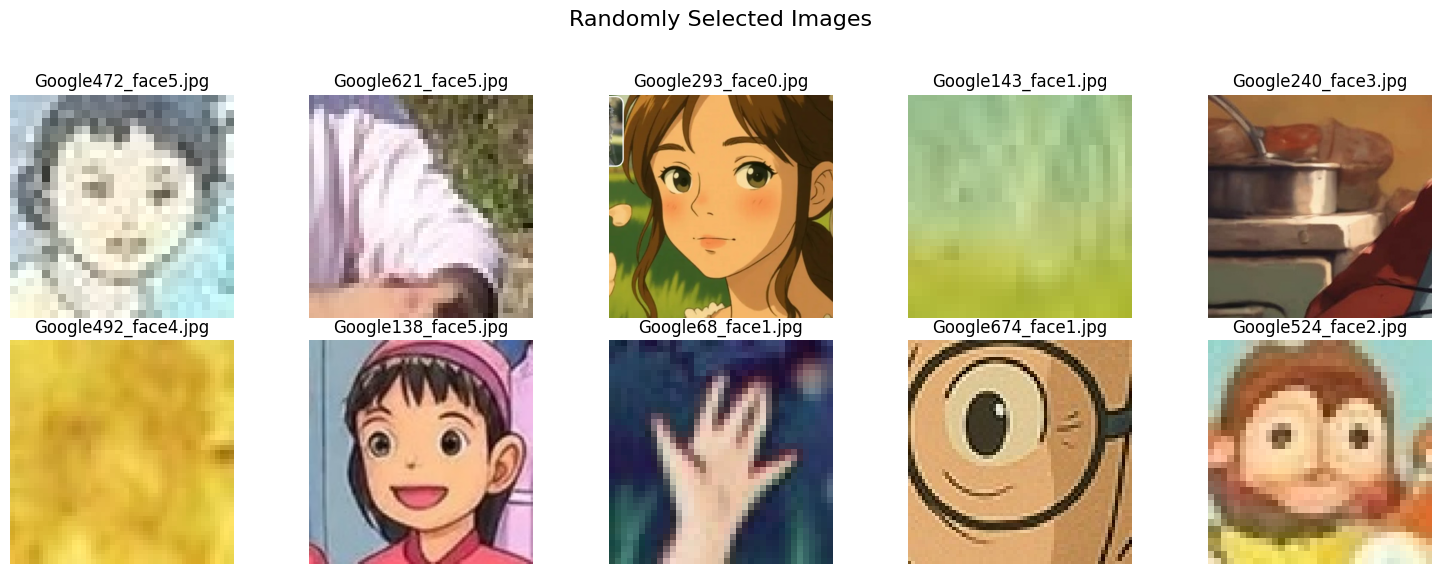

In [20]:

plot_random_images(f"./data/final_trainB_/", num_images=10)
